In [1]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import pdb
import matplotlib.dates as mdates
import pandas as pd
#import pandas as pd

from scipy.sparse import coo_matrix
from math import log, exp
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve,average_precision_score
from sklearn.metrics.pairwise import cosine_similarity
from PyNetSim import PyNetSim
from random import randint
import datetime

In [2]:
def spare_martix_generator(slice_start, slice_end, mataData):
    row = []
    col = []
    data = []
    for i in mataData:
        if (i[2] >= slice_start and i[3] <= slice_end or
            i[2] <= slice_start and i[2] >= slice_start or
            i[3] <= slice_end and i[3] >= slice_end):
            # pdb.set_trace()
            if i[0] in row and col[row.index(i[0])] == i[1]:
                pass
            else:
                row.append(i[0]-1)
                col.append(i[1]-1)
                data.append(1)
    m = coo_matrix((data, (row, col)), shape=(SIZE, SIZE))
    return m


In [7]:
np.set_printoptions(suppress=True)
base_timestamp = 1250496000
active_data = np.genfromtxt("../MSNs data/sigcomm2009.txt")
friend_ship_begin = np.genfromtxt("../MSNs data/friends1.csv", skip_header=1, delimiter=';')
friend_ship_end = np.genfromtxt("../MSNs data/friends2.csv",  skip_header=1, delimiter=';')
t_min = min(active_data[:, 2])
t_max = max(active_data[:, 3])

SIZE = max(active_data[:, 0]) if max(active_data[:, 1]) <  max(active_data[:, 1]) else  max(active_data[:, 1])
SIZE = int(SIZE)
spare_martix = spare_martix_generator(t_min, t_min+3400, active_data)
adj_martix = spare_martix.todense()
adj_martix[adj_martix > 0] = 1



In [8]:
adj_martix

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

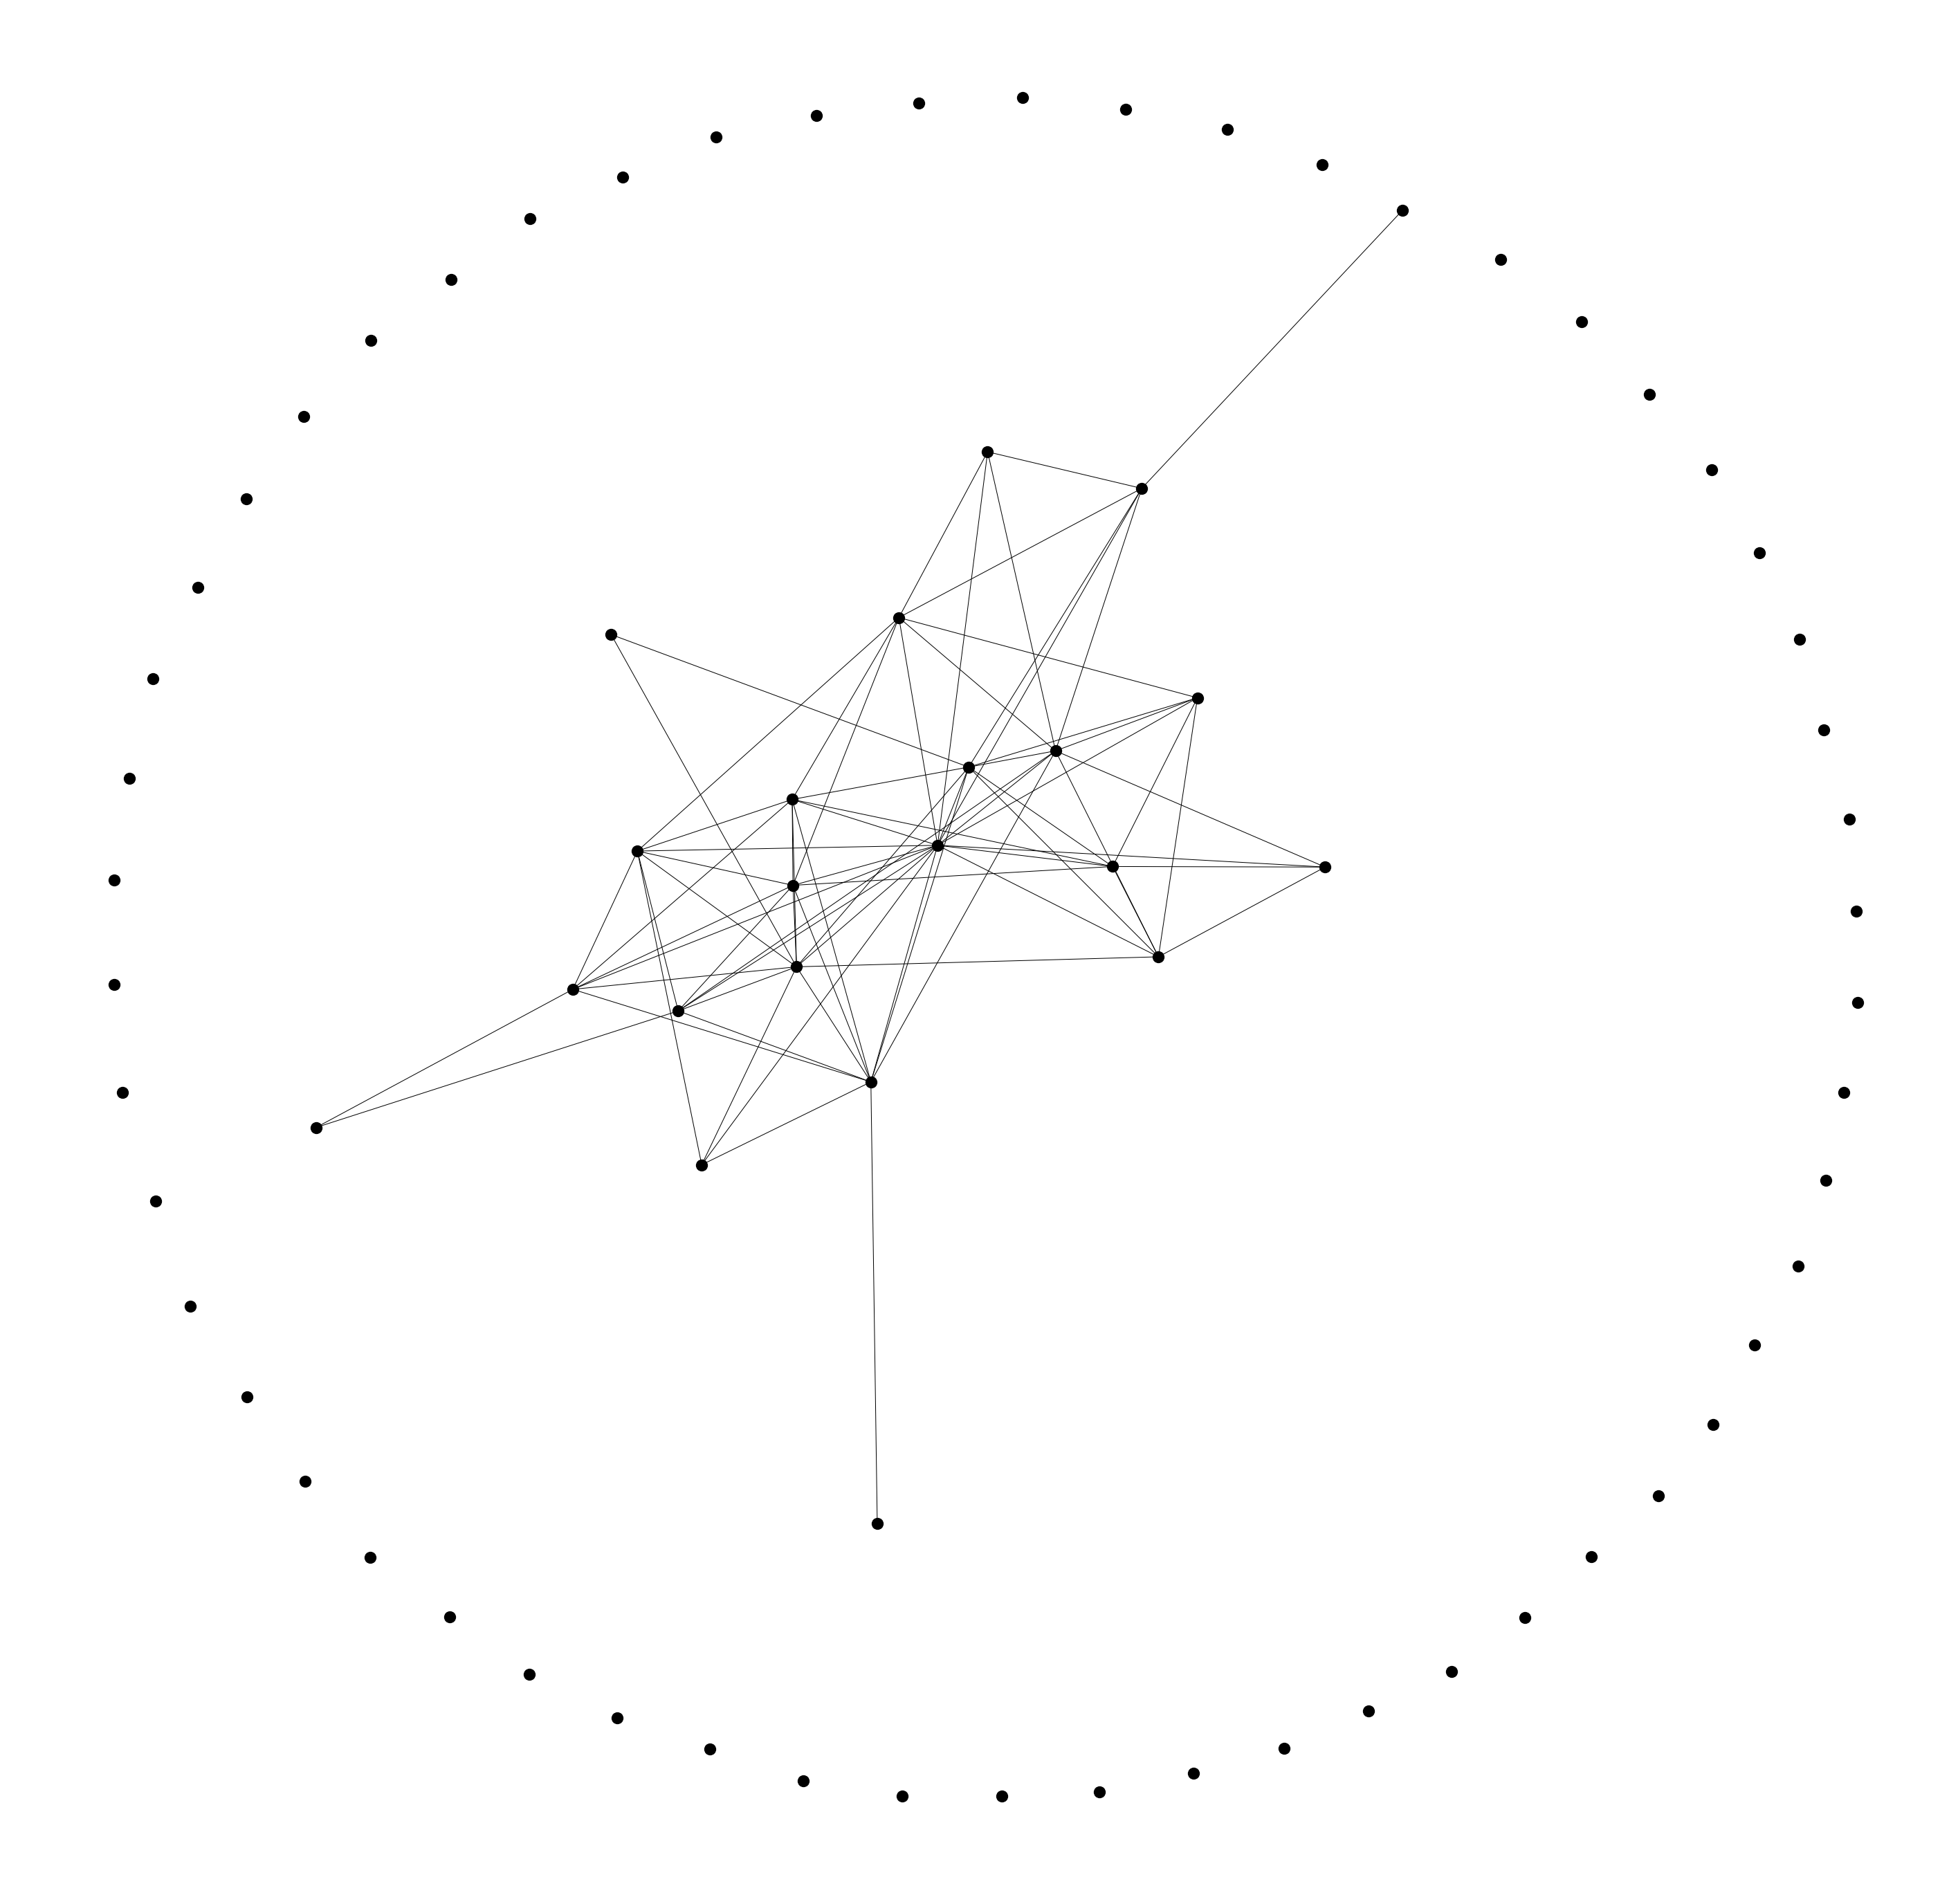

In [9]:
plt.figure(figsize=(50,50))
G=nx.from_numpy_matrix(adj_martix)
# position is stored as node attribute data for random_geometric_graph
nx.draw_networkx(G, with_labels=False, node_size = 300, node_color='k', linewidths=0.01, width=1)


plt.axis('off')
plt.savefig('random_geometric_graph.png')
plt.show()

In [10]:
1.0 in range(0,10)

True

In [11]:
def get_nodes_contact(first_node, second_node, data):
    contact_list = {}
    count = 0
    for contact in data:
        if (contact[0] == first_node and contact[1] == second_node) or (contact[0] == second_node and contact[1] == first_node):
            contact_list[count] = [datetime.datetime.fromtimestamp(base_timestamp+contact[2]).strftime('%Y-%m-%d %H:%M:%S'),
                                   datetime.datetime.fromtimestamp(base_timestamp+contact[3]).strftime('%Y-%m-%d %H:%M:%S')]
            count +=1
    return contact_list

def get_nodes_contact_duration(first_node, second_node, data):
    contact_list = {}
    count = 0
    for contact in data:
        if (contact[0] == first_node and contact[1] == second_node) or (contact[0] == second_node and contact[1] == first_node):
            contact_list[count] = contact[3] - contact[2]
            count +=1
    return contact_list

In [12]:
def counter_contact(first_node, second_node, data):
    contact_list = {}
    count = 0
    for contact in data:
        if (contact[0] == first_node and contact[1] == second_node) or (contact[0] == second_node and contact[1] == first_node):
            count +=1
    return count

In [13]:
def if_they_are_friend(node, friend_ship_begin, friend_ship_end):
    node_list = range(0,76)
    old_friend_list = [old_friend[1] for old_friend in friend_ship_begin if old_friend[0] == node]
    new_friend_list = {}
    for i in friend_ship_end:
        if i[0] == node:
            new_friend_list[i[1]] = base_timestamp + i[2]
    ainofriend = [i for i in node_list if (i not in old_friend_list and i not in new_friend_list.keys())]
    
    return old_friend_list, new_friend_list, ainofriend


In [35]:
a,b,c = if_they_are_friend(1, friend_ship_begin, friend_ship_end)

contact_time = {}
contact_time_n = {}

for i in range(0, SIZE):
    friend, b_friend, not_friend = if_they_are_friend(i+1, friend_ship_begin, friend_ship_end)
    contact_time[i+1] = sum([counter_contact(i+1, j, active_data) for j in friend])/(len(friend)+1)
    contact_time_n[i+1] = sum([counter_contact(i+1, j, active_data) for j in not_friend])/(len(not_friend)+1)
        




[40, 51, 100, 69, 10]
[9, 2, 2, 10, 7]


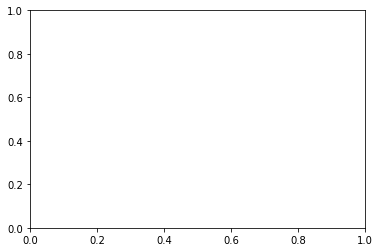

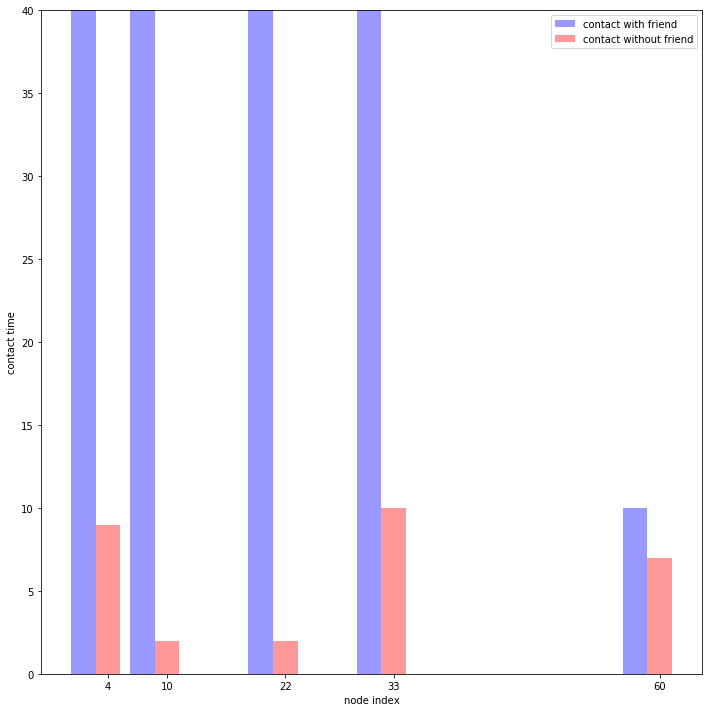

In [51]:
index = np.array([4, 10, 22, 33, 60])
data = [contact_time[i] for i in index]
data_n = [contact_time_n[i] for i in index]
print data 
print data_n
fig, ax = plt.subplots()
bar_width = 2.5

plt.figure(figsize=(10,10))
opacity = 0.4
rects1 = plt.bar(index, data, bar_width,alpha=opacity, color='b',label='contact with friend')
rects2 = plt.bar(index + bar_width, data_n, bar_width, alpha=opacity,color='r',label='contact without friend')

plt.xlabel('node index')
plt.ylabel('contact time')
plt.xticks(index + bar_width, ('4', '10', '22', '33', '60'))
plt.ylim(0,40)
plt.legend()

plt.tight_layout()
plt.show()    




In [78]:
node1_and_node22 = get_nodes_contact(1,22, active_data)
node1_and_node10 = get_nodes_contact(1,10, active_data)
node1_and_node40 = get_nodes_contact(1,40, active_data)
node1_and_node69 = get_nodes_contact(1,69, active_data)

In [79]:
node1_and_node22_duration = get_nodes_contact_duration(1,22, active_data)
node1_and_node10_duration = get_nodes_contact_duration(1,10, active_data)
node1_and_node40_duration = get_nodes_contact_duration(1,40, active_data)
node1_and_node69_duration = get_nodes_contact_duration(1,69, active_data)

In [81]:
def get_dates_times(time_list):
    dates = []
    times = []
    for i in time_list:
        data, time = i.split(' ')
        dates.append(data)
        times.append(time)
    #x = mdates.datestr2num(dates)
    times = mdates.datestr2num(times)
    dates = [pd.to_datetime(d) for d in dates]
    
    return dates, times

In [82]:
list_of_datetimes1_22 = [i[0] for i in node1_and_node22.values()]
list_of_datetimes1_10 = [i[0] for i in node1_and_node10.values()]
list_of_datetimes1_40 = [i[0] for i in node1_and_node40.values()]
list_of_datetimes1_69 = [i[0] for i in node1_and_node69.values()]

dates1_22, times1_22 = get_dates_times(list_of_datetimes1_22)
dates1_10, times1_10 = get_dates_times(list_of_datetimes1_10)
dates1_40, times1_40 = get_dates_times(list_of_datetimes1_40)
dates1_69, times1_69 = get_dates_times(list_of_datetimes1_69)

In [83]:
from scipy.stats import gaussian_kde as kde
from matplotlib.colors import Normalize
from matplotlib import cm

N = 10000
mean = [0,0]
cov = [[2,2],[0,2]]

samples = np.random.multivariate_normal(mean,cov,N).T
densObj = kde( samples )

def makeColours( vals ):
    colours = np.zeros( (len(vals),3) )
    norm = Normalize( vmin=vals.min(), vmax=vals.max() )

    #Can put any colormap you like here.
    colours = [cm.ScalarMappable( norm=norm, cmap='jet').to_rgba( val ) for val in vals]

    return colours

colours = makeColours( densObj.evaluate( samples ) )

In [84]:
def rand_jitter(arr):
    stdev = .1*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

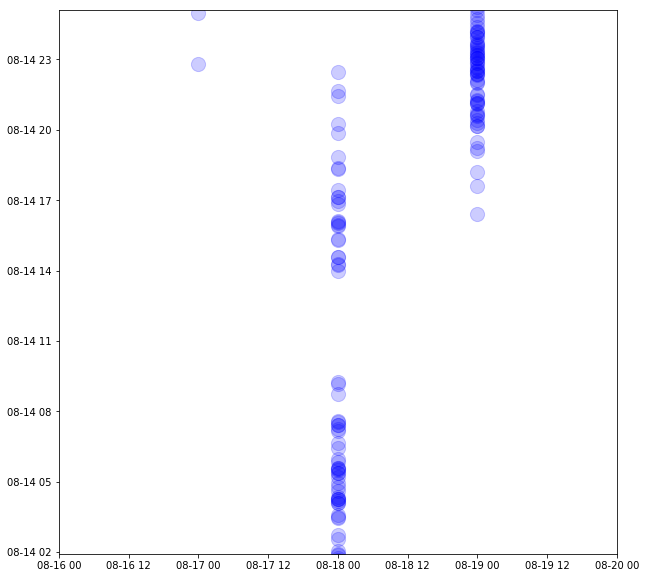

In [93]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(dates1_22, rand_jitter(times1_22),  s=200, color='b', alpha=0.2)
ax.set_xlim(['2009-08-16 00:00:00', '2009-08-20 00:00:00'])
ax.set_ylim([min(times1_22)-0.05, max(times1_22)+0.05])
ax.yaxis_date()

#Optional. Just rotates x-ticklabels in this case.
#fig.autofmt_xdate()
plt.show()

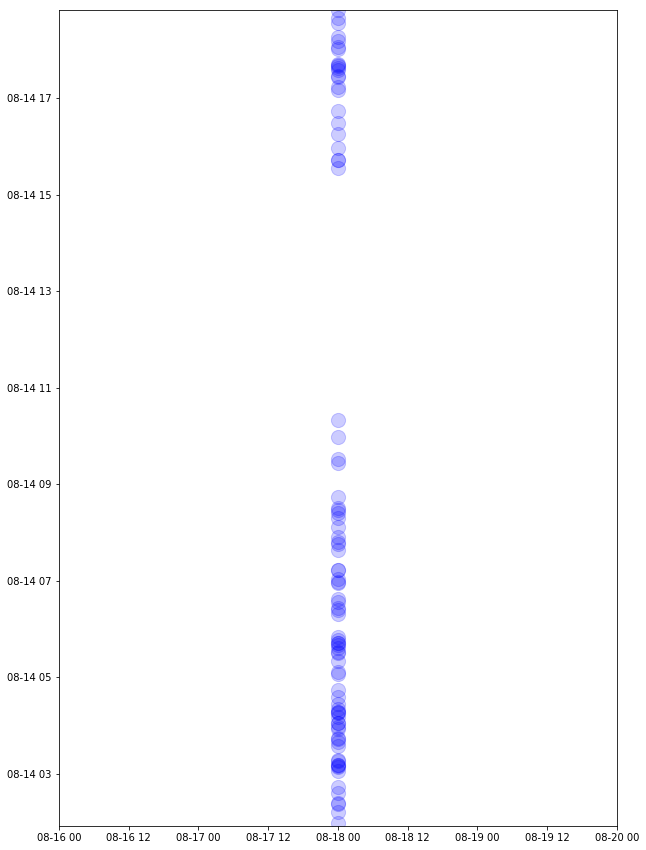

In [96]:
fig, ax = plt.subplots(figsize=(10,15))

ax.scatter(dates1_10, rand_jitter(times1_10),  marker='o', s=200, color='b', alpha=0.2)
ax.set_xlim(['2009-08-16 00:00:00', '2009-08-20 00:00:00'])
ax.set_ylim([min(times1_10)-0.05, max(times1_10)+0.05], auto=1)
ax.yaxis_date()

#Optional. Just rotates x-ticklabels in this case.
#fig.autofmt_xdate()
plt.show()

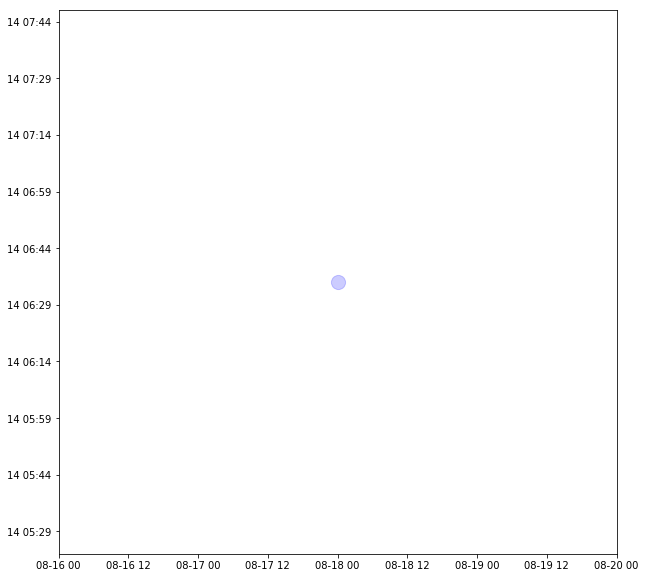

In [97]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(dates1_40, rand_jitter(times1_40), s=200, color='b', alpha=0.2)
ax.set_xlim(['2009-08-16 00:00:00', '2009-08-20 00:00:00'])
ax.set_ylim([min(times1_40)-0.05, max(times1_40)+0.05], auto=1)
ax.yaxis_date()

#Optional. Just rotates x-ticklabels in this case.
#fig.autofmt_xdate()
plt.show()

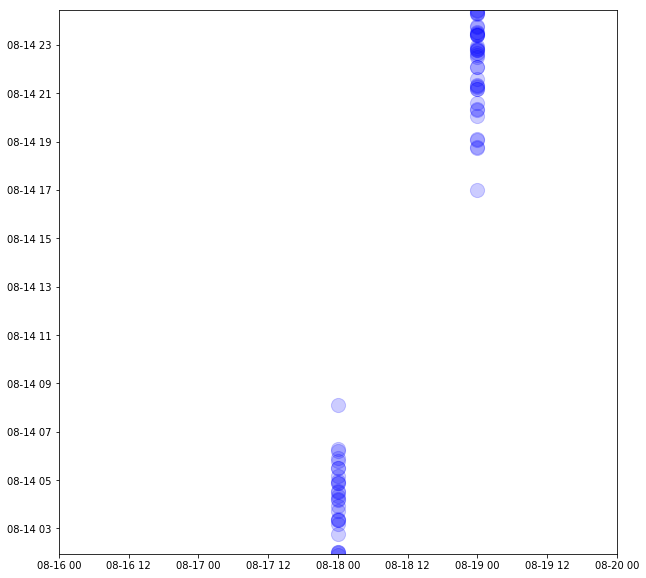

In [98]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(dates1_69, rand_jitter(times1_69),  s=200, color='b', alpha=0.2)
ax.set_xlim(['2009-08-16 00:00:00', '2009-08-20 00:00:00'])
ax.set_ylim([min(times1_69)-0.05, max(times1_69)+0.05], auto=1)
ax.yaxis_date()

#Optional. Just rotates x-ticklabels in this case.
#fig.autofmt_xdate()
plt.show()

In [20]:
node1_and_node69_duration = np.random.randint(1,50, 76)
for i in range(0,30):
    node1_and_node69_duration[i] = randint(1, 5)
for i in range(30,50):
    node1_and_node69_duration[i] = randint(5, 30)
node1_and_node69_duration.shape

(76,)

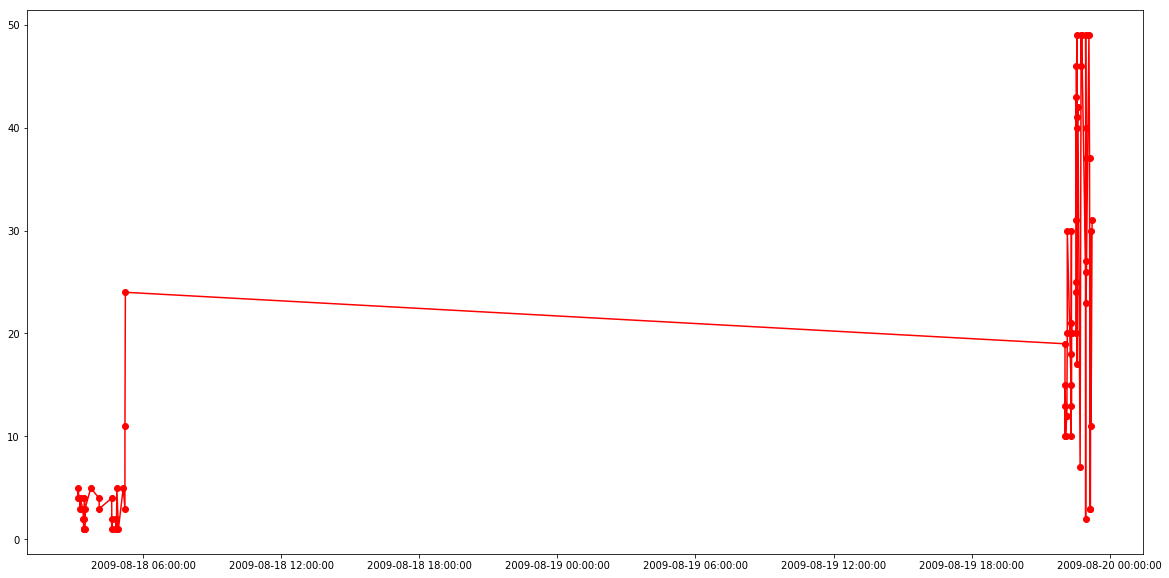

In [21]:
fig, ax = plt.subplots(figsize=(20,10))


times = [datetime.datetime.strptime(str(i), '%Y-%m-%d %H:%M:%S') for i in list_of_datetimes1_69]
times.sort()

times = matplotlib.dates.date2num(times)

xfmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.plot_date(times,node1_and_node69_duration, 'ro-')

plt.show()

In [18]:
#import datetime as dt
#import matplotlib as mpl

#list_of_datetimes = mpl.dates.datestr2num(list_of_datetimes)

In [ ]:
#y = list_of_datetimes % 1 + int(list_of_datetimes[0]) # (The int is so the y-axis starts at midnight...)

In [ ]:
#max(y)

In [ ]:
# I'm just plotting points here, but you could just as easily use a bar.
#fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111)
#ax.plot_date(list_of_datetimes, y, 'ro')
#ax.yaxis_date()
#fig.autofmt_xdate()
#plt.show()

In [ ]:
df = pd.DataFrame(list_of_datetimes, dtype=datetime)

In [ ]:
df